In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from resizeimage import resizeimage

In [2]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

In [3]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [5]:
model.compile(optimizer="adam",loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 23s 378us/sample - loss: 0.2666 - acc: 0.9238
Epoch 2/3
60000/60000 [==============================] - 13s 221us/sample - loss: 0.1115 - acc: 0.9658
Epoch 3/3
60000/60000 [==============================] - 15s 254us/sample - loss: 0.0758 - acc: 0.9761


In [7]:
loss, accuracy = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 146us/sample - loss: 0.1306 - acc: 0.9627


In [8]:
print("accuracy: ",accuracy)
print("loss: ",loss)

accuracy:  0.9627
loss:  0.13063334061317144


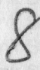

In [9]:
img = cv2.imread('Data/Cheque 083654.tif')[:,:,0]
test = img[420:490, 1840:1880]
Image.fromarray(test)

In [10]:
re_test = resizeimage.resize_crop(Image.fromarray(test), [28,28])

In [11]:

gray=np.invert(np.array(re_test).reshape(1,28,28))
prediction=model.predict(gray)
print(np.argmax(prediction))

8
